In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


2.4.1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17162562743978706588,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11140623232
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3519832335294556928
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"]

file_list: ['reagan.jpg', 'clinton.jpeg', 'trump.jpg', 'biden.jpg', 'bush.jpeg', 'obama.jpg']


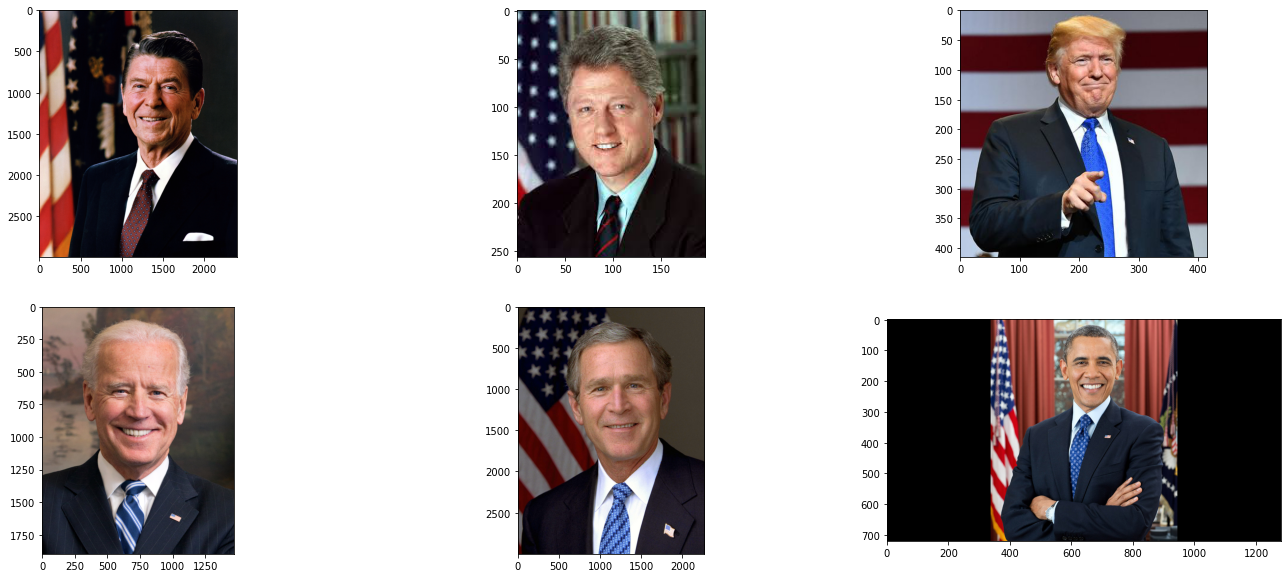

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))



#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

[(98, 758, 284, 572)]


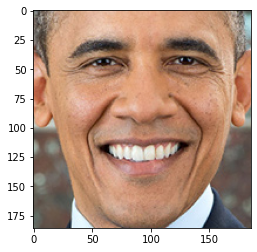

In [3]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

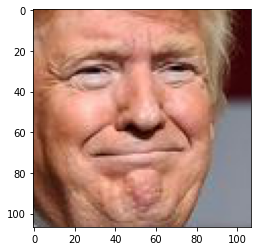

In [4]:
#얼굴 크롭 기능

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/trump.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [5]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['reagan.jpg', 'clinton.jpeg', 'trump.jpg', 'biden.jpg', 'bush.jpeg', 'obama.jpg']


In [6]:
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    #얼굴 임베딩 벡터를 구하는 함수
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.08126248,  0.11014761, -0.01082448, -0.05268792,  0.01033717,
        -0.00813808, -0.07251769, -0.0922646 ,  0.19304723, -0.09246384,
         0.23908533,  0.06770287, -0.22123125, -0.14119367,  0.05562152,
         0.13705511, -0.17924425, -0.07232306, -0.11183281, -0.11370818,
         0.03956435, -0.01019115,  0.0942178 ,  0.04493114, -0.12757549,
        -0.34449592, -0.05374938, -0.17703305,  0.00868226, -0.09721592,
        -0.09817187,  0.00278232, -0.17721367, -0.12789807,  0.03489833,
        -0.01991234, -0.00838933, -0.00132862,  0.18308581,  0.02447568,
        -0.1237656 ,  0.09957044,  0.02323568,  0.22983313,  0.2838524 ,
         0.06655717, -0.00558912, -0.09833544,  0.10058986, -0.23476946,
         0.06006292,  0.1341591 ,  0.08373027,  0.03900504,  0.10194533,
        -0.19337648,  0.01717628,  0.08978969, -0.16005114,  0.01892098,
         0.03082444, -0.06051281, -0.04526773,  0.04633342,  0.20678686,
         0.10299795, -0.12437531, -0.0490516 ,  0.1

In [7]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [8]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['trump']
#128차원

array([-0.15962467,  0.20268655,  0.0323635 ,  0.02439232, -0.06226439,
        0.05140705,  0.07351795, -0.16823348,  0.06962204, -0.05557961,
        0.17270109, -0.05094168, -0.35293093, -0.0316438 ,  0.03792984,
        0.17343847, -0.13260126, -0.15357377, -0.23523533, -0.08442692,
       -0.00134139,  0.03210667, -0.08926154, -0.02670781, -0.09581181,
       -0.25792354, -0.01056999, -0.11071672,  0.03133569, -0.07444921,
        0.05670552, -0.02273796, -0.19461137, -0.04576054,  0.00947582,
        0.01806056, -0.1502624 , -0.07787319,  0.17577608,  0.01933258,
       -0.19744575, -0.03930519,  0.07374467,  0.20196027,  0.1476755 ,
       -0.0141539 ,  0.0172476 , -0.11976205,  0.09462971, -0.24318144,
       -0.02755127,  0.12169892,  0.14837705,  0.17079785,  0.06952555,
       -0.15360466,  0.02005427,  0.08199155, -0.19544823,  0.10653654,
        0.11468476, -0.21902837, -0.07677591, -0.06791042,  0.10587606,
        0.05921567, -0.06115703, -0.11171092,  0.23917492, -0.15

file_list: ['강하늘.jpg', '구원찬.jpg', '고세원.jpg', '김그림.jpg', '김가희.jpg', '강인봉.jpg']


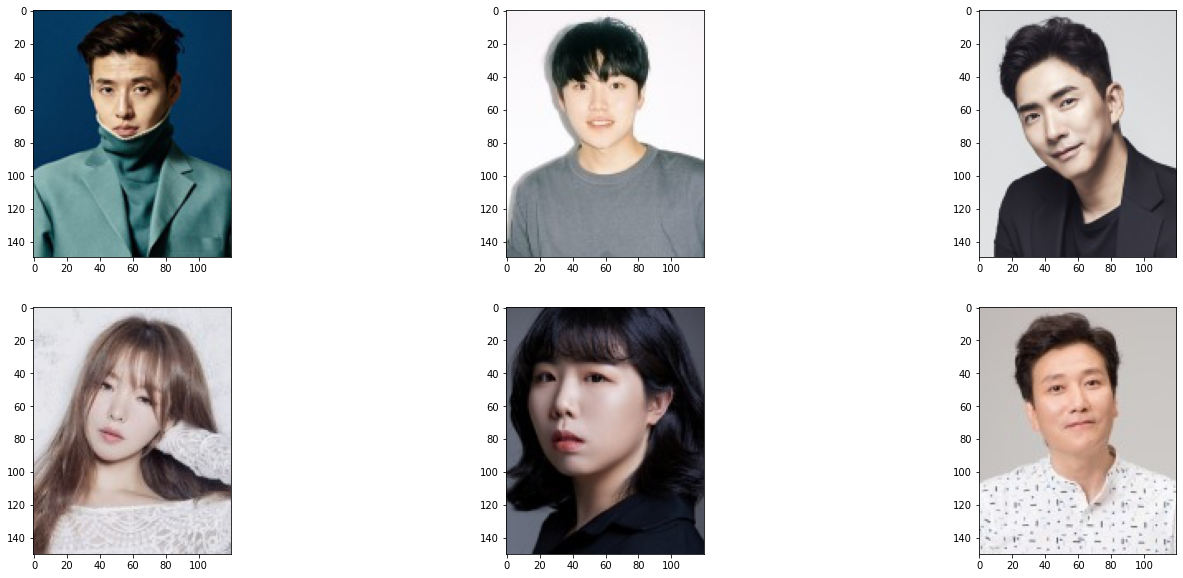

In [9]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/minidata'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list[:6]))



#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

/aiffel/aiffel/face_embedding/my_face.jpg
[(1576, 1682, 2534, 723)]


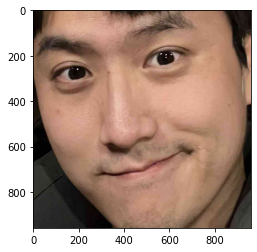

In [10]:
image_path = os.getenv('HOME') + '/aiffel/face_embedding/minidata/my_face.jpg'
print(image_path)
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)


try :
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
except IndexError:
    pass

plt.imshow(cropped_face)

In [19]:
image_file
face = get_cropped_face(image_file)

print(face)
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[[[123 124 119]
  [122 133 127]
  [118 128 127]
  ...
  [ 96  95  90]
  [ 92  91  86]
  [ 89  88  83]]

 [[120 117 112]
  [121 127 123]
  [124 130 130]
  ...
  [ 91  94  87]
  [ 90  95  88]
  [ 89  94  87]]

 [[119 114 110]
  [124 129 123]
  [150 154 153]
  ...
  [ 94 107  98]
  [ 93 109  99]
  [ 95 115 106]]

 ...

 [[106 117 109]
  [102 109 102]
  [100 103  96]
  ...
  [ 89  78  74]
  [ 90  80  78]
  [ 93  85  82]]

 [[105 118 109]
  [104 114 106]
  [101 106  99]
  ...
  [ 92  82  73]
  [ 91  81  71]
  [ 91  82  73]]

 [[101 114 105]
  [101 111 103]
  [ 99 106  99]
  ...
  [ 91  82  73]
  [ 89  76  60]
  [ 90  74  59]]]


[array([-0.08126248,  0.11014761, -0.01082448, -0.05268792,  0.01033717,
        -0.00813808, -0.07251769, -0.0922646 ,  0.19304723, -0.09246384,
         0.23908533,  0.06770287, -0.22123125, -0.14119367,  0.05562152,
         0.13705511, -0.17924425, -0.07232306, -0.11183281, -0.11370818,
         0.03956435, -0.01019115,  0.0942178 ,  0.04493114, -0.12757549,
        -0.34449592, -0.05374938, -0.17703305,  0.00868226, -0.09721592,
        -0.09817187,  0.00278232, -0.17721367, -0.12789807,  0.03489833,
        -0.01991234, -0.00838933, -0.00132862,  0.18308581,  0.02447568,
        -0.1237656 ,  0.09957044,  0.02323568,  0.22983313,  0.2838524 ,
         0.06655717, -0.00558912, -0.09833544,  0.10058986, -0.23476946,
         0.06006292,  0.1341591 ,  0.08373027,  0.03900504,  0.10194533,
        -0.19337648,  0.01717628,  0.08978969, -0.16005114,  0.01892098,
         0.03082444, -0.06051281, -0.04526773,  0.04633342,  0.20678686,
         0.10299795, -0.12437531, -0.0490516 ,  0.1

In [12]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    
    for file in file_list:
        if file.endswith(".jpg"):
            print(file)
            img_path = os.path.join(dir_path, file)
            try:
                face = get_cropped_face(img_path)
                embedding = get_face_embedding(face)
                
            except:
                pass
        
            if len(embedding) > 0:
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                
    return embedding_dict

In [20]:

embedding_dict = get_face_embedding_dict(dir_path)


강하늘.jpg
구원찬.jpg
고세원.jpg
김그림.jpg
김가희.jpg
강인봉.jpg
김국희.jpg
권은수.jpg
고창석.jpg
강경준.jpg
기도훈.jpg
길용우.jpg
김단우.jpg
김동률.jpg
강수지.jpg
강동원.jpg
강문경.jpg
구혜선.jpg
금사향.jpg
강태오.jpg
공유.jpg
강수진.jpg
기주봉.jpg
권태원.jpg
김도연.jpg
김경현.jpg
김가은.jpg
강타.jpg
기태영.jpg
강문영.jpg
김다미.jpg
금잔디.jpg
강남길.jpg
김뢰하.jpg
강다현.jpg
강이석.jpg
강소연.jpg
김국환.jpg
김동명.jpg
고소영.jpg
견우.jpg
길학미.jpg
개리.jpg
권율.jpg
고경표.jpg
강정우.jpg
강리나.jpg
강예원.jpg
강성진.jpg
고유진.jpg
김갑수.jpg
구윤회.jpg
김경호.jpg
김민준.jpg
길미.jpg
김강우.jpg
강한나.jpg
김규종.jpg
김규선.jpg
가희.jpg
고아성.jpg
건지.jpg
권은아.jpg
강기영.jpg
고인범.jpg
강경헌.jpg
금새록.jpg
강은탁.jpg
고두심.jpg
김다현.jpg
김광석.jpg
강신일.jpg
김나영.jpg
곽동연.jpg
김도윤.jpg
김동한.jpg
권상우.jpg
길해연.jpg
김무열.jpg
김나운.jpg
강두리.jpg
고윤.jpg
곽지민.jpg
김민종.jpg
김대명.jpg
김민.jpg
거미.jpg
고민시.jpg
김민주.jpg
강승윤.jpg
김동희.jpg
강별.jpg
권유리.jpg
권소현.jpg
고주원.jpg
김꽃비.jpg
길정우.jpg
권동호.jpg
강봉성.jpg
강지환.jpg
권성희.jpg
곽창선.jpg
간미연.jpg
김민석.jpg
권화운.jpg
김다솜.jpg
고수.jpg
곽정욱.jpg
강성연.jpg
권오중.jpg
김명준.jpg
김남주.jpg
김민상.jpg
김동완.jpg
강부자.jpg
강석우.jpg
권현상.jpg
강예빈.jpg
김강훈.jpg
김권.jpg
강혜연.jpg
기은세.jpg
견미리.jpg
김범.jpg
강성아.jpg
길은정.jpg
김민경.jpg

In [21]:
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('my_face', '권인하')

0.6604431698207225

In [22]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [23]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0:
            print('내 사진 : {}'.format(sorted_faces[i][0]))
            image = img.imread(dir_path+'/'+sorted_faces[i][0]+'.jpg')
            plt.imshow(image)
            plt.show()
            print()
            continue
        if sorted_faces[i]:
            print('순위 {} : {}, 거리 : {}'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            image = img.imread(dir_path+'/'+sorted_faces[i][0]+'.jpg')
            plt.imshow(image)
            plt.show()

내 사진 : my_face


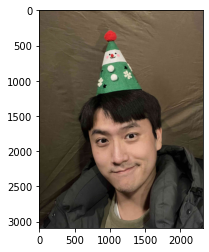


순위 1 : 김동욱, 거리 : 0.43577338375320446


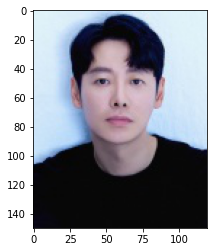

순위 2 : 강기영, 거리 : 0.4404683475970557


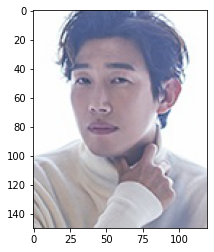

순위 3 : 강수지, 거리 : 0.45230816220160425


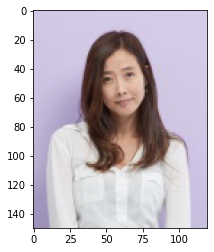

순위 4 : 김동완, 거리 : 0.4580508695562749


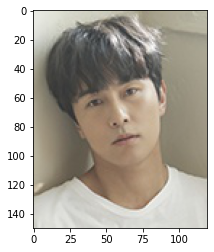

순위 5 : 김동명, 거리 : 0.46118592391822255


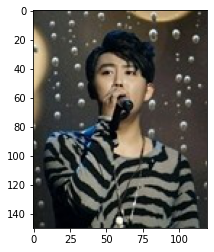

In [24]:
get_nearest_face('my_face')

# 회고

이미지를 벡터화하고 128차원으로 압축하고 차원간의 거리로 유사도를 찾는 과정을 배웠습니다.
인공지능 모델로 학습한건 아니지만. 고전적인 방법으로 간단하게 해볼수있다는게 신기합니다.